In [1]:
import numpy as np
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import copy
from mlp import MLP

SEED = 5 #random.randint(1,100) # Fix for reproductibility

Text(0, 0.5, 'X1')

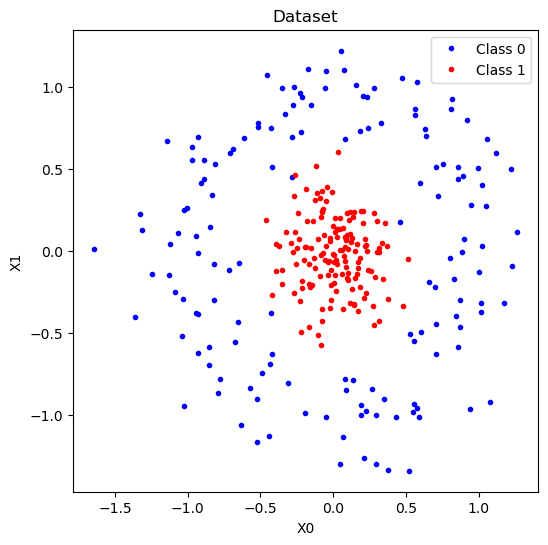

In [2]:
X,y = make_circles(n_samples=300, factor=0.1, noise=0.2,random_state=SEED)
n,s = X.shape
plt.figure(1,figsize=(6,6))
plt.plot(X[:,0][np.where(y==0)],X[:,1][np.where(y==0)],'.b', label='Class 0')
plt.plot(X[:,0][np.where(y==1)],X[:,1][np.where(y==1)],'.r', label='Class 1')
plt.title("Dataset")
plt.legend()
plt.xlabel("X0")
plt.ylabel("X1")

## Network Creation

In [3]:
i = 0
archi = [2,10, 1]
mlp = MLP(X,y,archi)
mlp.visualize()
mlp.forward(i)
mlp.backprop(i)
epsi=1e-3
mlp2 = copy.deepcopy(mlp)
mlp2.net[1][0].w[0] = mlp.net[1][0].w[0] + epsi
print("numerical derivative is :",(mlp2.forward(i) - mlp.forward(i))/epsi)
print("computed derivative is  :",mlp.net[1][0].w_grad[0])

Layer0
|I| |I| 
Layer1
|N0| |N1| |N2| |N3| |N4| |N5| |N6| |N7| |N8| |N9| 
Layer2
|N0| 
Layer3
|O| 
Nomber of parameters : 41
numerical derivative is : 0.040561120642906845
computed derivative is  : 0.04055720371564745


In [4]:
mlp.train(50,0.01)

epoch 0 loss 0.7556969987099231
epoch 1 loss 0.6858661107056252
epoch 2 loss 0.679818757065178
epoch 3 loss 0.6755706915282131
epoch 4 loss 0.6715759741143263
epoch 5 loss 0.667676189959247
epoch 6 loss 0.6638053167070994
epoch 7 loss 0.6599148200782489
epoch 8 loss 0.6559643819027215
epoch 9 loss 0.6519195379638576
epoch 10 loss 0.6477504373613865
epoch 11 loss 0.6434309956215534
epoch 12 loss 0.6389382940038788
epoch 13 loss 0.6342521599928744
epoch 14 loss 0.6293548854030655
epoch 15 loss 0.6242310494489157
epoch 16 loss 0.6188674213556372
epoch 17 loss 0.6132529221418885
epoch 18 loss 0.6073786287941318
epoch 19 loss 0.6012378066324211
epoch 20 loss 0.5948259575671254
epoch 21 loss 0.5881408734109032
epoch 22 loss 0.5811826846289063
epoch 23 loss 0.5739538960301294
epoch 24 loss 0.5664594020368926
epoch 25 loss 0.5587064753978087
epoch 26 loss 0.5507047245784493
epoch 27 loss 0.5424660165837017
epoch 28 loss 0.5340043636112926
epoch 29 loss 0.5253357736497175
epoch 30 loss 0.516478

In [5]:
print(y[:3])
print(mlp.predict(0),mlp.predict(1),mlp.predict(2))

[0 1 1]
0.2377071740276466 0.735487974525042 0.7466157174225189


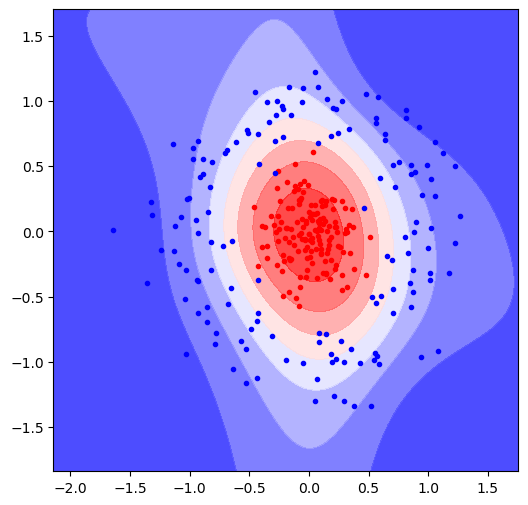

In [6]:
h = .02
x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
x11, x22 = np.meshgrid(np.arange(x1_min, x1_max, h),np.arange(x2_min, x2_max, h))
X_disp = np.c_[x11.ravel(), x22.ravel()]
n_disp = X_disp.shape[0]
Z = []
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X_disp[:,u]
for i in range(n_disp):
    Z.append(mlp.predict(i))
for u in range(mlp.archi[0]):
    mlp.net[0][u].data = X[:,u]
Z = np.array(Z)
Z = Z.reshape(x11.shape)
plt.figure(2,figsize=[6,6])
plt.plot(X[:,0][np.where(y==1)],X[:,1][np.where(y==1)],'.r')
plt.plot(X[:,0][np.where(y==0)],X[:,1][np.where(y==0)],'.b')
plt.contourf(x11, x22, Z, cmap=plt.cm.bwr, alpha=.8)